In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
data=pd.read_csv("features.csv")

In [81]:
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [82]:
data.describe

<bound method NDFrame.describe of       Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\1961826927.py:19: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



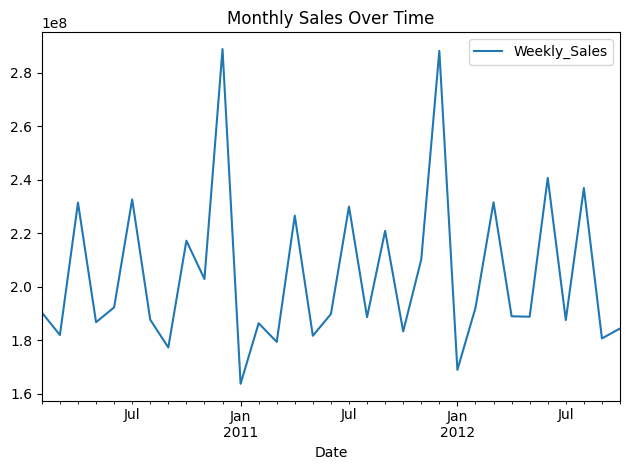

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import seaborn as sns

# Load dataset
df = pd.read_csv('data/train.csv', parse_dates=['Date'])

# Aggregate weekly sales data by Date
df = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Resample to monthly frequency
monthly_sales = df.set_index('Date').resample('ME').sum()

# Fill missing months
monthly_sales = monthly_sales.asfreq('ME').fillna(method='ffill')

# Plot
monthly_sales.plot(title='Monthly Sales Over Time')
plt.tight_layout()
plt.show()


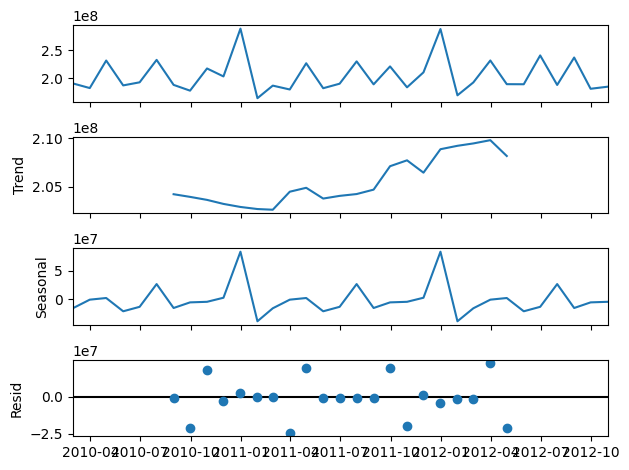

In [84]:
decomposition = seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.tight_layout()
plt.show()


23:38:13 - cmdstanpy - INFO - Chain [1] start processing
23:38:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



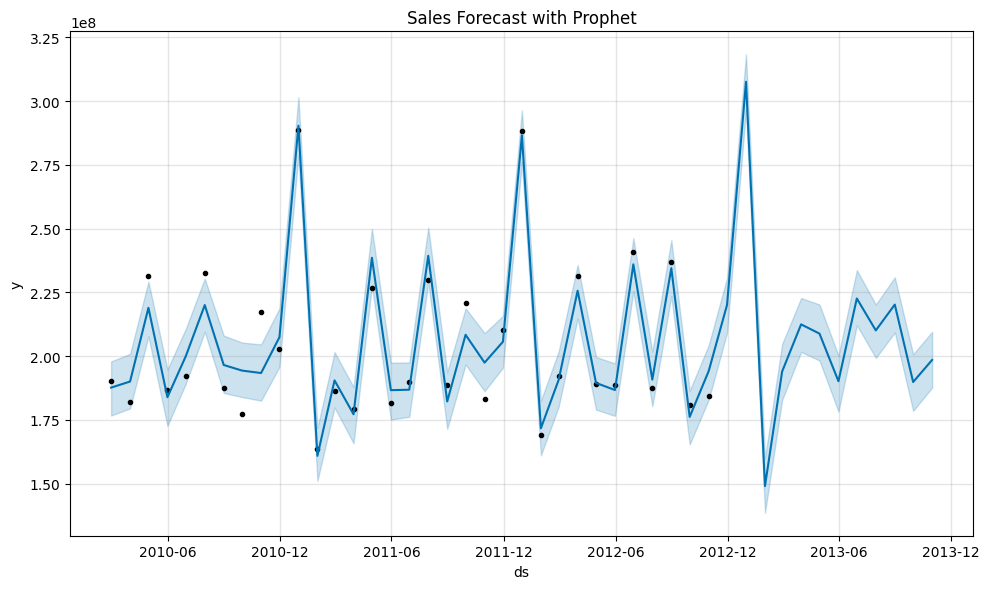

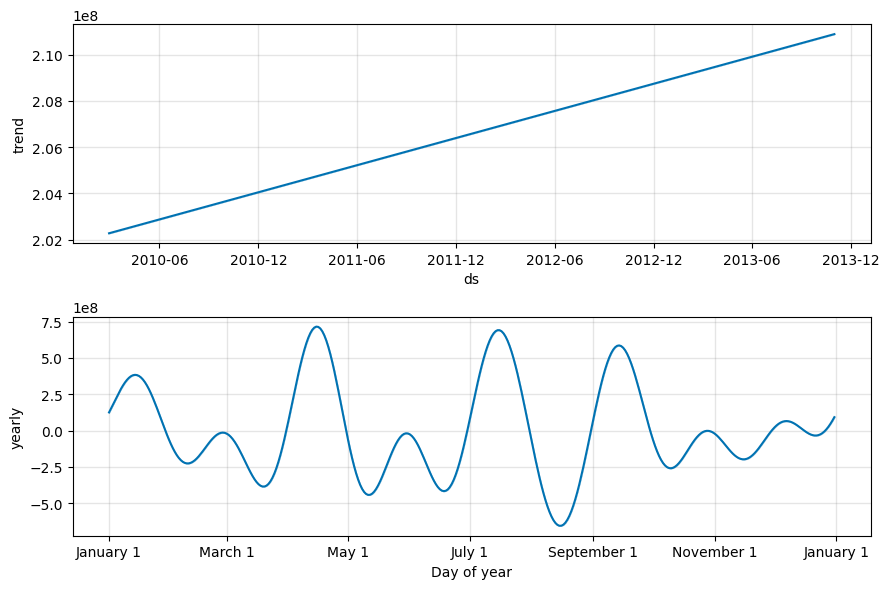

In [85]:
# Prepare data for Prophet
prophet_df = monthly_sales.reset_index()
prophet_df.columns = ['ds', 'y']

# Train Prophet model
model = Prophet()
model.fit(prophet_df)

# Future dates
future = model.make_future_dataframe(periods=12, freq='M')

# Predict
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Sales Forecast with Prophet")
plt.tight_layout()
plt.show()

# Components
model.plot_components(forecast)
plt.tight_layout()
plt.show()


In [86]:
# Compare forecasted values with actuals
merged = pd.merge(prophet_df, forecast[['ds', 'yhat']], on='ds', how='left')
merged.dropna(inplace=True)

mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 6580853.35
RMSE: 8407181.99


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\3135733519.py:18: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\3135733519.py:18: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

23:38:14 - cmdstanpy - INFO - Chain [1] start processing
23:38:15 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



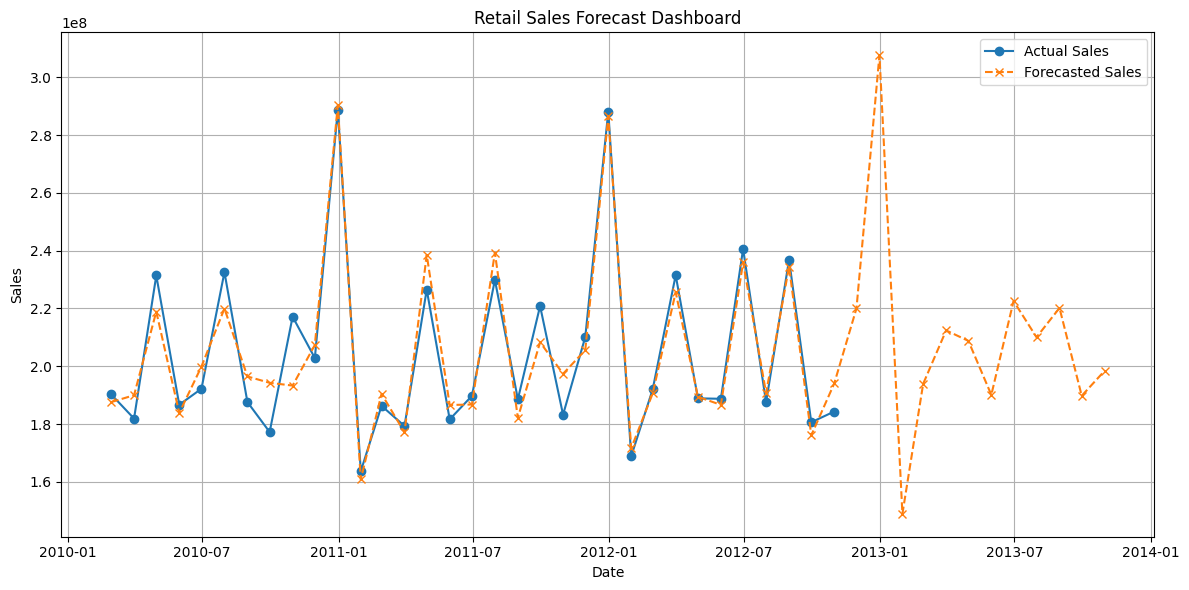

In [87]:
import matplotlib.pyplot as plt

def plot_dashboard(actual, forecast):
    plt.figure(figsize=(12, 6))
    plt.plot(actual['ds'], actual['y'], label='Actual Sales', marker='o')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', linestyle='--', marker='x')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title('Retail Sales Forecast Dashboard')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    merged = pd.read_csv('data/train.csv', parse_dates=['Date'])
    merged = merged.groupby('Date')['Weekly_Sales'].sum().reset_index()
    monthly = merged.set_index('Date').resample('M').sum().fillna(method='ffill').reset_index()
    monthly.columns = ['ds', 'y']

    model = Prophet()
    model.fit(monthly)
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)

    plot_dashboard(monthly, forecast)


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\576411840.py:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\576411840.py:12: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\576411840.py:50: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



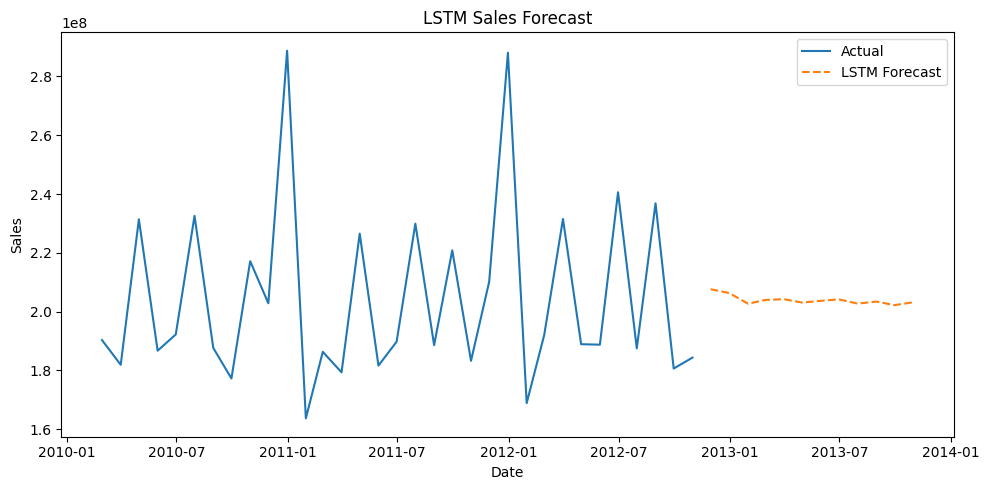

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv("data/train.csv", parse_dates=["Date"])
df = df.groupby("Date")["Weekly_Sales"].sum().reset_index()
df = df.set_index("Date").resample("M").sum().fillna(method="ffill")

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.values)

# Create sequences
def create_dataset(data, time_step=12):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

# LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X, y, epochs=50, batch_size=8, verbose=0)

# Forecast future steps
n_future = 12
future_input = scaled_data[-12:].reshape(1, 12, 1)
future_preds = []

for _ in range(n_future):
    pred = model.predict(future_input)[0]
    future_preds.append(pred)
    future_input = np.append(future_input[:, 1:, :], [[pred]], axis=1)

# Inverse scale
predicted_sales = scaler.inverse_transform(future_preds)

# Date range for forecast
forecast_dates = pd.date_range(df.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='M')

# Combine actual and forecast
forecast_df = pd.DataFrame({
    "Date": forecast_dates,
    "Forecasted_Sales": predicted_sales.flatten()
})

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Weekly_Sales"], label="Actual")
plt.plot(forecast_df["Date"], forecast_df["Forecasted_Sales"], label="LSTM Forecast", linestyle='--')
plt.title("LSTM Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()


In [89]:
import pandas as pd
import plotly.graph_objs as go
from prophet import Prophet

# Load and prepare data
df = pd.read_csv("data/train.csv", parse_dates=["Date"])
df = df.groupby("Date")["Weekly_Sales"].sum().reset_index()
df = df.set_index("Date").resample("M").sum().fillna(method="ffill").reset_index()
df.columns = ['ds', 'y']

# Prophet model
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)

# Plotly interactive dashboard
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines+markers', name='Actual Sales'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))

fig.update_layout(
    title='Retail Sales Forecast with Prophet (Interactive)',
    xaxis_title='Date',
    yaxis_title='Sales',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\1491982978.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\1491982978.py:8: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

23:38:20 - cmdstanpy - INFO - Chain [1] start processing
23:38:20 - cmdstanpy - INFO - Chain [1] done processing


In [90]:
import pandas as pd
from prophet import Prophet
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
import plotly.graph_objs as go

# Load and preprocess data
df = pd.read_csv('data/train.csv', parse_dates=['Date'])
df = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df = df.set_index('Date').resample('ME').sum().fillna(method='ffill').reset_index()
df.columns = ['ds', 'y']

# Train Prophet model
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)

# Initialize Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
server = app.server

# Layout
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H2("Retail Sales Forecast Dashboard"), className="mb-4")
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='sales-forecast', config={'displayModeBar': False}), width=12)
    ]),
], fluid=True)

# Callback to generate Plotly figure
@app.callback(
    dash.dependencies.Output('sales-forecast', 'figure'),
    dash.dependencies.Input('sales-forecast', 'id')
)
def update_graph(_):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], name='Actual Sales', mode='lines+markers'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Forecasted Sales', mode='lines'))

    fig.update_layout(
        title="Retail Sales Forecast (Prophet)",
        xaxis_title="Date",
        yaxis_title="Sales",
        template="plotly_white",
        hovermode="x unified"
    )
    return fig

# Run app
if __name__ == '__main__':
    app.run(debug=True)


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\2479853239.py:11: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

23:38:20 - cmdstanpy - INFO - Chain [1] start processing
23:38:21 - cmdstanpy - INFO - Chain [1] done processing


[2025-05-22 23:38:22,464] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'ds'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 880, in full_dispatch_request
    rv = self.dispat

In [91]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("data/train.csv", parse_dates=["Date"])
df = df.groupby("Date")["Weekly_Sales"].sum().reset_index()
df = df.set_index("Date").resample("M").sum().fillna(method="ffill")

# Split data
train_size = int(len(df) * 0.9)
train_df, test_df = df.iloc[:train_size], df.iloc[train_size:]

# Prophet Model
prophet_df = df.reset_index().rename(columns={"Date": "ds", "Weekly_Sales": "y"})
prophet_train = prophet_df.iloc[:train_size]
model_prophet = Prophet()
model_prophet.fit(prophet_train)
future = model_prophet.make_future_dataframe(periods=len(test_df), freq="M")
forecast_prophet = model_prophet.predict(future)
prophet_preds = forecast_prophet.iloc[-len(test_df):]["yhat"].values

# ARIMA Model
arima_model = ARIMA(train_df, order=(2, 1, 2))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test_df))
arima_preds = arima_forecast.values

# LSTM Model
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.values)

def create_lstm_dataset(data, time_step=12):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

X_all, y_all = create_lstm_dataset(scaled_data)
X_train = X_all[:train_size - 12]
y_train = y_all[:train_size - 12]
X_test = X_all[train_size - 12:]
y_test_scaled = y_all[train_size - 12:]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer="adam", loss="mean_squared_error")
model_lstm.fit(X_train, y_train, epochs=10, batch_size=8, verbose=0)

lstm_preds_scaled = model_lstm.predict(X_test)
lstm_preds = scaler.inverse_transform(lstm_preds_scaled)

# Ground truth
y_true = test_df.values[:len(lstm_preds)]

# Metrics
mae_prophet = mean_absolute_error(y_true, prophet_preds[:len(y_true)])
rmse_prophet = np.sqrt(mean_squared_error(y_true, prophet_preds[:len(y_true)]))

mae_arima = mean_absolute_error(y_true, arima_preds[:len(y_true)])
rmse_arima = np.sqrt(mean_squared_error(y_true, arima_preds[:len(y_true)]))

mae_lstm = mean_absolute_error(y_true, lstm_preds)
rmse_lstm = np.sqrt(mean_squared_error(y_true, lstm_preds))

(mae_prophet, rmse_prophet, mae_arima, rmse_arima, mae_lstm, rmse_lstm)


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\2794229979.py:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\2794229979.py:14: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

23:38:21 - cmdstanpy - INFO - Chain [1] start processing
23:38:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instea

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


(71178813.98125187,
 77331016.23240665,
 33001436.048827834,
 34650304.3008394,
 23290138.097499996,
 24132922.788303867)

In [92]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def train_lstm_model(data, time_step=12):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    def create_dataset(dataset):
        X, y = [], []
        for i in range(len(dataset) - time_step):
            X.append(dataset[i:i + time_step])
            y.append(dataset[i + time_step])
        return np.array(X), np.array(y)

    X, y = create_dataset(scaled_data)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.9)
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]

    model = Sequential()
    model.add(LSTM(50, return_sequences=False, input_shape=(time_step, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=10, batch_size=8, verbose=0)

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    return y_test, predictions


In [93]:
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def forecast_prophet(df):
    prophet_df = df.reset_index().rename(columns={"Date": "ds", "Weekly_Sales": "y"})
    train_size = int(len(prophet_df) * 0.9)
    train_df = prophet_df.iloc[:train_size]

    model = Prophet()
    model.fit(train_df)
    future = model.make_future_dataframe(periods=len(prophet_df) - train_size, freq='ME')
    forecast = model.predict(future)

    y_true = prophet_df['y'].iloc[train_size:].values
    y_pred = forecast['yhat'].iloc[train_size:].values

    return y_true, y_pred

def forecast_arima(df):
    train_size = int(len(df) * 0.9)
    train = df.iloc[:train_size]
    test = df.iloc[train_size:]

    model = ARIMA(train, order=(2, 1, 2))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))

    return test.values, forecast.values


In [94]:
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def forecast_prophet(df):
    prophet_df = df.reset_index().rename(columns={"Date": "ds", "Weekly_Sales": "y"})
    train_size = int(len(prophet_df) * 0.9)
    train_df = prophet_df.iloc[:train_size]

    model = Prophet()
    model.fit(train_df)
    future = model.make_future_dataframe(periods=len(prophet_df) - train_size, freq='ME')
    forecast = model.predict(future)

    y_true = prophet_df['y'].iloc[train_size:].values
    y_pred = forecast['yhat'].iloc[train_size:].values

    return y_true, y_pred

def forecast_arima(df):
    train_size = int(len(df) * 0.9)
    train = df.iloc[:train_size]
    test = df.iloc[train_size:]

    model = ARIMA(train, order=(2, 1, 2))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))

    return test.values, forecast.values


In [96]:
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
import plotly.graph_objects as go
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and preprocess data
df = pd.read_csv('data/train.csv', parse_dates=['Date'])
df = df.groupby('Date')['Weekly_Sales'].sum().resample('M').sum().fillna(method='ffill')
df = df.to_frame()

# Forecast using all models
true_arima, pred_arima = forecast_arima(df)
true_prophet, pred_prophet = forecast_prophet(df)
true_lstm, pred_lstm = train_lstm_model(df["Weekly_Sales"])

# Ensure all series have only the last 12 months
true_arima = true_arima[-12:]
pred_arima = pred_arima[-12:]
true_prophet = true_prophet[-12:]
pred_prophet = pred_prophet[-12:]
true_lstm = true_lstm[-12:]
pred_lstm = pred_lstm.flatten()[-12:]

# Use last 12 months for time index
time_index = df.index[-12:]

# Convert to millions
true_arima /= 1_000_000
pred_arima /= 1_000_000
true_prophet /= 1_000_000
pred_prophet /= 1_000_000
true_lstm /= 1_000_000
pred_lstm /= 1_000_000

# Remove any NaN just in case
true_arima = np.nan_to_num(true_arima)
pred_arima = np.nan_to_num(pred_arima)
true_prophet = np.nan_to_num(true_prophet)
pred_prophet = np.nan_to_num(pred_prophet)
true_lstm = np.nan_to_num(true_lstm)
pred_lstm = np.nan_to_num(pred_lstm)

# Evaluation
def evaluate(y_true, y_pred):
    return round(mean_absolute_error(y_true, y_pred), 2), round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)

mae_a, rmse_a = evaluate(true_arima, pred_arima)
mae_p, rmse_p = evaluate(true_prophet, pred_prophet)
mae_l, rmse_l = evaluate(true_lstm, pred_lstm)

# Build Dashboard
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.SLATE])
server = app.server

app.layout = dbc.Container([
    html.H2("Retail Sales Forecasting Dashboard", className="my-4 text-center"),
    dbc.Row([
        dbc.Col(dcc.Graph(
            figure=go.Figure([
                go.Scatter(
                    x=time_index,
                    y=true_arima,
                    mode='lines+markers',
                    name='Actual Sales',
                    line=dict(color='blue')
                ),
                go.Scatter(
                    x=time_index,
                    y=pred_arima,
                    mode='lines+markers',
                    name='ARIMA Forecast',
                    line=dict(color='red')
                ),
                go.Scatter(
                    x=time_index,
                    y=pred_prophet,
                    mode='lines+markers',
                    name='Prophet Forecast',
                    line=dict(color='green')
                ),
                go.Scatter(
                    x=time_index,
                    y=pred_lstm,
                    mode='lines+markers',
                    name='LSTM Forecast',
                    line=dict(color='magenta')
                ),
            ]).update_layout(
                title='Forecast Comparison',
                xaxis_title='Time',
                yaxis_title='Sales (in millions)',
                plot_bgcolor='#2d2d2d',
                paper_bgcolor='#2d2d2d',
                font=dict(color='white')
            )
        ))
    ]),
    html.H4("Evaluation Metrics (Last 12 Months)", className="mt-4"),
    dbc.Row([
        dbc.Col(html.Div(f"ARIMA - MAE: {mae_a}, RMSE: {rmse_a}")),
        dbc.Col(html.Div(f"Prophet - MAE: {mae_p}, RMSE: {rmse_p}")),
        dbc.Col(html.Div(f"LSTM - MAE: {mae_l}, RMSE: {rmse_l}")),
    ])
], fluid=True)

if __name__ == '__main__':
    app.run(debug=True)


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\3337931190.py:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\3337931190.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

23:40:07 - cmdstanpy - INFO - Chain [1] start processing
23:40:07 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [97]:
import pandas as pd
import plotly.graph_objs as go
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Load and prepare data
df = pd.read_csv("data/train.csv", parse_dates=["Date"])
df = df.groupby("Date")["Weekly_Sales"].sum().reset_index()
df = df.set_index("Date").resample("M").sum().fillna(method="ffill")
ts = df['Weekly_Sales']

# Fit ARIMA model (you might tune p,d,q)
model = ARIMA(ts, order=(5,1,0))
model_fit = model.fit()

# Forecast next 12 months
forecast_result = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')
forecast = pd.DataFrame({
    'ds': forecast_index,
    'yhat': forecast_result.predicted_mean
})

# Reset index for actual data for plotting consistency
actual = ts.reset_index()
actual.columns = ['ds', 'y']

# Plotly interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=actual['ds'], y=actual['y'], mode='lines+markers', name='Actual Sales'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))

fig.update_layout(
    title='Retail Sales Forecast with ARIMA (Interactive)',
    xaxis_title='Date',
    yaxis_title='Sales',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\177424184.py:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\177424184.py:9: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\177424184.py:18: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [98]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and prepare data
df = pd.read_csv("data/train.csv", parse_dates=["Date"])
df = df.groupby("Date")["Weekly_Sales"].sum().reset_index()
df = df.set_index("Date").resample("M").sum().fillna(method="ffill")

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# Create sequences for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i+look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3  # Using 3 months to predict next month
X, y = create_dataset(scaled_data, look_back)

# Reshape input to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X, y, epochs=100, verbose=0)

# Predict the next 12 months
predictions = []
last_sequence = scaled_data[-look_back:].reshape(1, look_back, 1)

for _ in range(12):
    pred = model.predict(last_sequence)[0,0]
    predictions.append(pred)
    last_sequence = np.append(last_sequence[:,1:,:], [[[pred]]], axis=1)

# Inverse transform predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1,1))

# Prepare forecast dataframe
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')
forecast = pd.DataFrame({'ds': forecast_index, 'yhat': predictions.flatten()})

# Prepare actual data for plotting
actual = df.reset_index()
actual.columns = ['ds', 'y']

# Plotly interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=actual['ds'], y=actual['y'], mode='lines+markers', name='Actual Sales'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))

fig.update_layout(
    title='Retail Sales Forecast with LSTM (Interactive)',
    xaxis_title='Date',
    yaxis_title='Sales',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\25700979.py:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\25700979.py:11: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_2376\25700979.py:53: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output

# Load and prepare data (same as before)
df_raw = pd.read_csv("data/train.csv", parse_dates=["Date"])
df = df_raw.groupby("Date")["Weekly_Sales"].sum().reset_index()
df = df.set_index("Date").resample("M").sum().fillna(method="ffill")
ts = df['Weekly_Sales']

# Prophet forecast
df_prophet = df.reset_index()
df_prophet.columns = ['ds', 'y']
model_prophet = Prophet()
model_prophet.fit(df_prophet)
future = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast_prophet = model_prophet.predict(future)
forecast_prophet = forecast_prophet[['ds', 'yhat']].tail(12).reset_index(drop=True)

# ARIMA forecast
arima_model = ARIMA(ts, order=(5,1,0))
arima_fit = arima_model.fit()
forecast_arima_result = arima_fit.get_forecast(steps=12)
forecast_arima_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')
forecast_arima = pd.DataFrame({
    'ds': forecast_arima_index,
    'yhat': forecast_arima_result.predicted_mean
})

# LSTM forecast
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i+look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
X, y = create_dataset(scaled_data, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X, y, epochs=100, verbose=0)

predictions = []
last_seq = scaled_data[-look_back:].reshape(1, look_back, 1)
for _ in range(12):
    pred = lstm_model.predict(last_seq)[0, 0]
    predictions.append(pred)
    last_seq = np.append(last_seq[:, 1:, :], [[[pred]]], axis=1)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
forecast_lstm_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')
forecast_lstm = pd.DataFrame({'ds': forecast_lstm_index, 'yhat': predictions.flatten()})

# Prepare actual data for plotting
actual = df.reset_index()
actual.columns = ['ds', 'y']

# Colors
COLOR_ACTUAL = "#222222"
COLOR_PROPHET = "#007bff"   # Bootstrap primary blue
COLOR_ARIMA = "#dc3545"     # Bootstrap danger red
COLOR_LSTM = "#28a745"      # Bootstrap success green
BG_COLOR = "#f8f9fa"        # Light gray background
CARD_BG = "white"
FONT_FAMILY = "'Segoe UI', Tahoma, Geneva, Verdana, sans-serif"

# Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': BG_COLOR, 'fontFamily': FONT_FAMILY, 'minHeight': '100vh', 'padding': '20px'}, children=[
    html.Header([
        html.H1("Retail Sales Forecast Comparison", style={'color': COLOR_PROPHET, 'textAlign': 'center', 'marginBottom': '5px'}),
        html.P("Compare forecasts from Prophet, ARIMA, and LSTM models on monthly retail sales data.",
               style={'textAlign': 'center', 'color': '#555', 'fontSize': '18px', 'marginTop': '0', 'marginBottom': '30px'})
    ]),

    html.Div(style={
        'maxWidth': '900px',
        'margin': '0 auto',
        'backgroundColor': CARD_BG,
        'boxShadow': '0 4px 8px rgba(0,0,0,0.1)',
        'borderRadius': '8px',
        'padding': '25px'
    }, children=[
        html.Label("Select Forecast Model", style={'fontWeight': '600', 'fontSize': '16px', 'marginBottom': '10px', 'display': 'block'}),
        dcc.Dropdown(
            id='model-dropdown',
            options=[
                {'label': 'Prophet Forecast', 'value': 'prophet'},
                {'label': 'ARIMA Forecast', 'value': 'arima'},
                {'label': 'LSTM Forecast', 'value': 'lstm'},
                {'label': 'All Forecasts Comparison', 'value': 'all'}
            ],
            value='prophet',
            clearable=False,
            style={'fontSize': '16px'}
        ),

        dcc.Graph(id='forecast-graph', style={'marginTop': '30px'})
    ]),

    html.Footer([
        html.P("© 2025 Retail Forecasting Dashboard", style={'textAlign': 'center', 'color': '#888', 'marginTop': '50px', 'fontSize': '14px'})
    ])
])

@app.callback(
    Output('forecast-graph', 'figure'),
    Input('model-dropdown', 'value')
)
def update_graph(selected_model):
    fig = go.Figure()

    # Actual sales trace
    fig.add_trace(go.Scatter(
        x=actual['ds'], y=actual['y'],
        mode='lines+markers',
        name='Actual Sales',
        line=dict(color=COLOR_ACTUAL, width=3),
        marker=dict(size=6)
    ))

    if selected_model == 'prophet':
        fig.add_trace(go.Scatter(
            x=forecast_prophet['ds'], y=forecast_prophet['yhat'],
            mode='lines+markers',
            name='Prophet Forecast',
            line=dict(color=COLOR_PROPHET, width=3, dash='solid'),
            marker=dict(size=6)
        ))
    elif selected_model == 'arima':
        fig.add_trace(go.Scatter(
            x=forecast_arima['ds'], y=forecast_arima['yhat'],
            mode='lines+markers',
            name='ARIMA Forecast',
            line=dict(color=COLOR_ARIMA, width=3, dash='dot'),
            marker=dict(size=6)
        ))
    elif selected_model == 'lstm':
        fig.add_trace(go.Scatter(
            x=forecast_lstm['ds'], y=forecast_lstm['yhat'],
            mode='lines+markers',
            name='LSTM Forecast',
            line=dict(color=COLOR_LSTM, width=3, dash='dash'),
            marker=dict(size=6)
        ))
    elif selected_model == 'all':
        fig.add_trace(go.Scatter(
            x=forecast_prophet['ds'], y=forecast_prophet['yhat'],
            mode='lines+markers',
            name='Prophet Forecast',
            line=dict(color=COLOR_PROPHET, width=3, dash='solid'),
            marker=dict(size=6)
        ))
        fig.add_trace(go.Scatter(
            x=forecast_arima['ds'], y=forecast_arima['yhat'],
            mode='lines+markers',
            name='ARIMA Forecast',
            line=dict(color=COLOR_ARIMA, width=3, dash='dot'),
            marker=dict(size=6)
        ))
        fig.add_trace(go.Scatter(
            x=forecast_lstm['ds'], y=forecast_lstm['yhat'],
            mode='lines+markers',
            name='LSTM Forecast',
            line=dict(color=COLOR_LSTM, width=3, dash='dash'),
            marker=dict(size=6)
        ))

    fig.update_layout(
        title='Retail Sales Forecast',
        xaxis_title='Date',
        yaxis_title='Sales',
        hovermode='x unified',
        template='plotly_white',
        font=dict(family=FONT_FAMILY),
        legend=dict(title='Legend', font=dict(size=14), bgcolor='rgba(255,255,255,0.9)', bordercolor='#ddd', borderwidth=1),
        margin=dict(l=40, r=40, t=60, b=40),
        height=600
    )

    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgba(200,200,200,0.2)')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(200,200,200,0.2)')

    return fig

if __name__ == '__main__':
    app.run(debug=True)


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_14944\3574424931.py:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_14944\3574424931.py:14: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

23:48:27 - cmdstanpy - INFO - Chain [1] start processing
23:48:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_14944\3574424931.py:30: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserW

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


C:\Users\Ankan Dutta\AppData\Local\Temp\ipykernel_14944\3574424931.py:65: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

